In [1]:
# pip install wordcloud

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

try:
    df = pd.read_csv('clean_tfidf.csv', encoding='ISO-8859-1')
except UnicodeDecodeError:
    print("Failed to read the file with ISO-8859-1 encoding.")

df = pd.DataFrame(df) # 5214 reviews
df.head()

,Unnamed: 0,review,rating,eng,words,girl,age,crime,child,moral,language,relationship,nabokov
0,0,"Between the CoversAfter re-reading ""Lolita"", I...",5.0,True,"['coversafter', 'rereading', 'lolita', 'asked'...",0.000000,0.042840,0.087179,0.009836,0.077652,0.009786,0.057813,0.043964
1,1,Nymph. Nymphet. Nymphetiquette. Nymphology. Ny...,5.0,True,"['nymph', 'nymphet', 'nymphetiquette', 'nympho...",0.036773,0.030969,0.047265,0.000000,0.018711,0.028296,0.000000,0.000000
2,2,"Now, this is going to be embarrassing to admit...",5.0,True,"['going', 'embarrassing', 'admitas', 'know', '...",0.057137,0.036088,0.036719,0.066286,0.000000,0.000000,0.116882,0.021163
3,3,I wasn't even going to write a review ofLolita...,4.0,True,"['wasnt', 'even', 'going', 'write', 'review', ...",0.000000,0.000000,0.000000,0.049274,0.000000,0.049021,0.000000,0.062926
4,4,"when i first read this book, i hated every sec...",4.0,True,"['first', 'read', 'book', 'hated', 'every', 's...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [3]:
df.dropna(inplace=True) # make sure no N/A's
# print(df.isnull().sum()) 
len(df)

4382

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


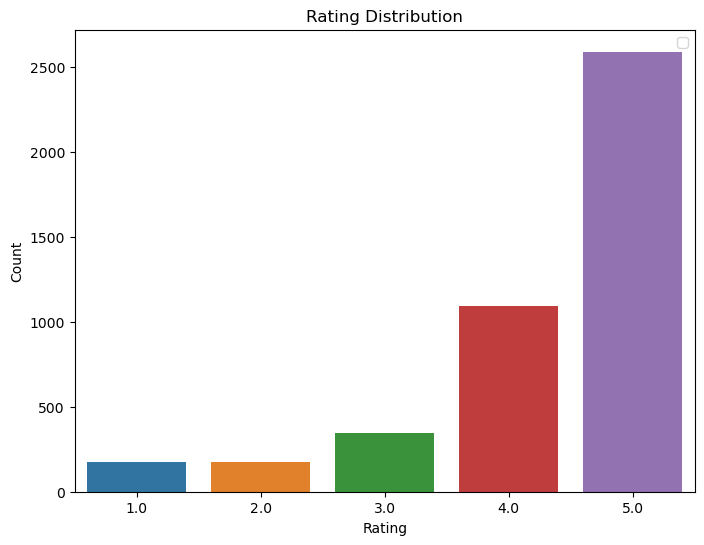

In [4]:
# Counts for each Rating: 1-5
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=df) # using seaborn (built ontop of Matplotlib) 
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


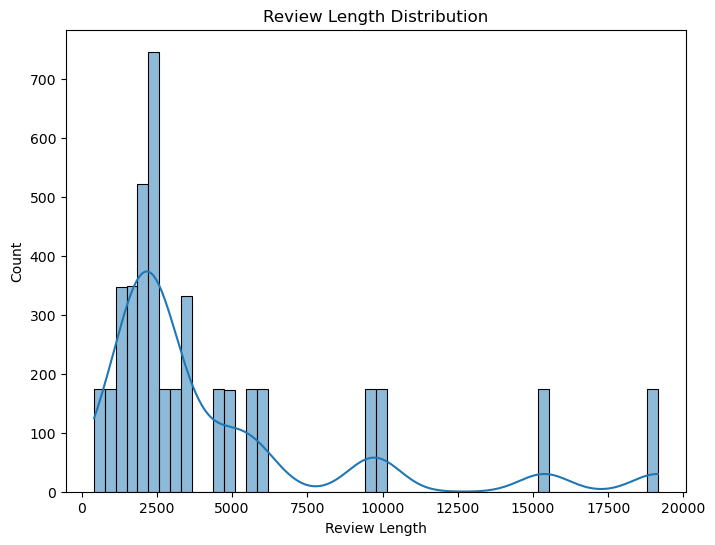

In [5]:
# Review length analysis
df['review_length'] = df['review'].apply(len) # new column in df representing length of review
plt.figure(figsize=(8, 6))
sns.histplot(df['review_length'], kde=True)
plt.title('Review Length Distribution')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show() # most reviews (~700) are just below 2500 characters

In [6]:
# Term frequency analysis
tfidf_terms = ['girl', 'age', 'crime', 'child', 'moral', 'language', 'relationship', 'nabokov']
df[tfidf_terms].describe() # summary statistics for tf-idf terms

,girl,age,crime,child,moral,language,relationship,nabokov
count,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000
mean,0.024361,0.014442,0.017356,0.019456,0.009979,0.015125,0.016907,0.042233
std,0.027627,0.023024,0.028420,0.034839,0.022332,0.023049,0.032539,0.033428
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010036
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043964
75%,0.040999,0.036088,0.036719,0.025002,0.000000,0.028296,0.018476,0.061632
max,0.094835,0.083712,0.087179,0.152449,0.077652,0.090270,0.116882,0.122138


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

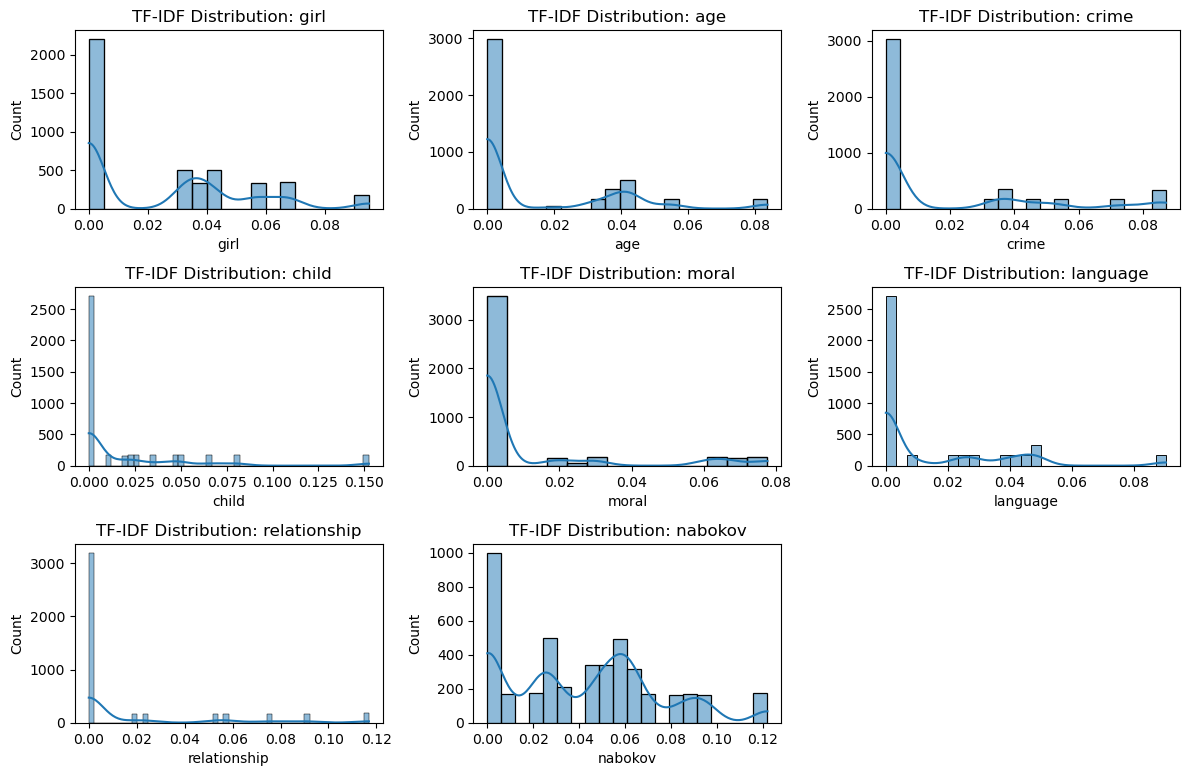

In [7]:
# Plot distribution of TF-IDF values for each term
plt.figure(figsize=(12, 10))
for i, term in enumerate(tfidf_terms, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[term], kde=True)
    plt.title(f'TF-IDF Distribution: {term}')
plt.tight_layout()
plt.show()

# starts from min TF-IDF score to maximum. The larger the TF-IDF score the more important the word is in determining the essence of a review.
# Here are the distributions of each term. 

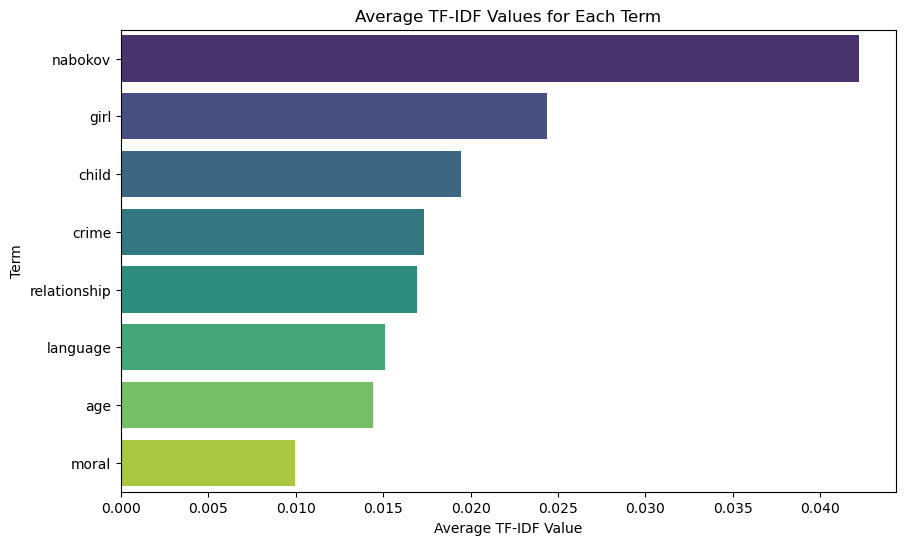

In [8]:
average_tfidf = df[tfidf_terms].mean().sort_values(ascending=False)

# Plot average TF-IDF values for each term
plt.figure(figsize=(10, 6))
sns.barplot(x=average_tfidf.values, y=average_tfidf.index, palette="viridis")
plt.xlabel('Average TF-IDF Value')
plt.ylabel('Term')
plt.title('Average TF-IDF Values for Each Term')
plt.show()

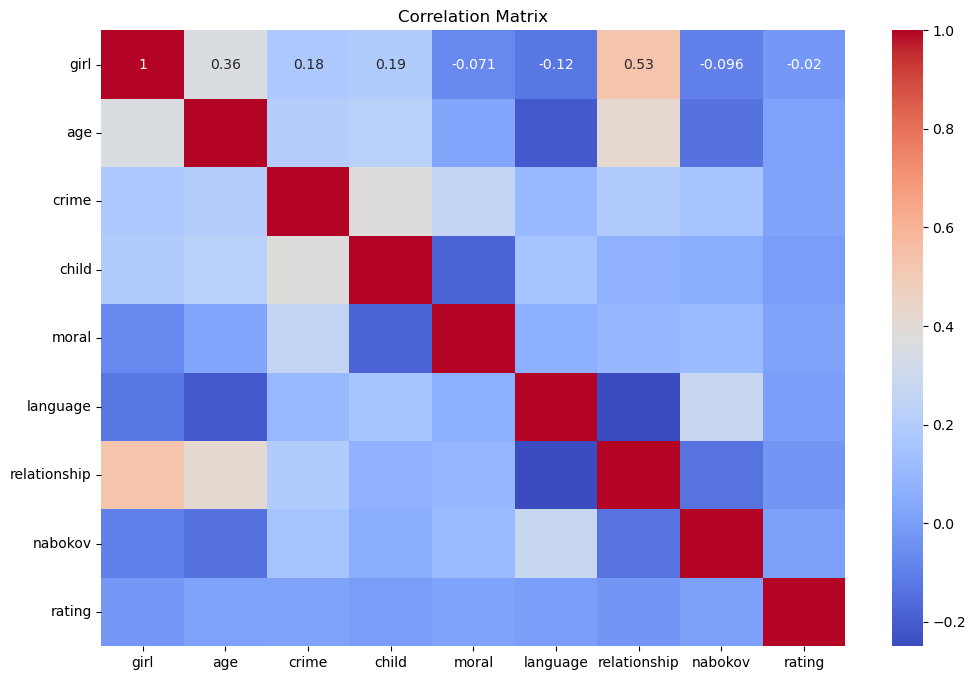

In [9]:
# Correlation analysis
correlation_matrix = df[tfidf_terms + ['rating']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show() 

# correlation matrix ranges 1 to -1 (in this case 1 to -0.2 as -0.2 is smallest correlation value). A positive relation between two 
# words represents that those words often either occur together or have similar functions in determining a status of the rating. 

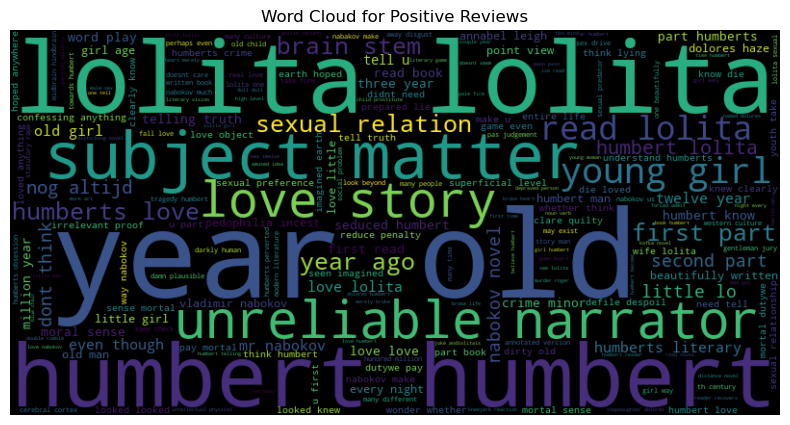

In [10]:
# Word cloud for high TF-IDF terms in positive reviews
positive_reviews = df[df['rating'] >= 4]['words']
positive_reviews = positive_reviews.str.replace("'", "")
positive_reviews_text = ' '.join(positive_reviews)
wordcloud_positive = WordCloud(width=800, height=400).generate(positive_reviews_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()

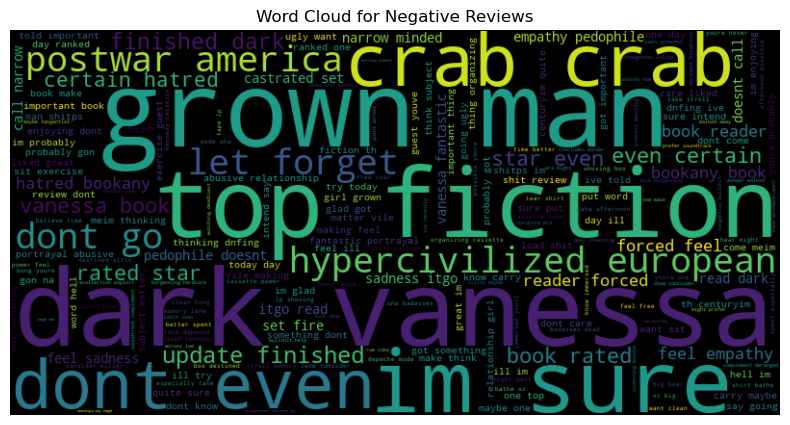

In [11]:
# Word cloud for high TF-IDF terms in negative reviews
negative_reviews = df[df['rating'] <= 2]['words']
negative_reviews = negative_reviews.str.replace("'", "")
negative_reviews_text = ' '.join(negative_reviews)
wordcloud_negative = WordCloud(width=800, height=400).generate(negative_reviews_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()